In [39]:
!pip install stop_words, textblob

ERROR: Invalid requirement: 'stop_words,'


In [40]:
from bs4 import BeautifulSoup
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, LSTM
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Fachri -
[nltk_data]     CSSO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Fachri -
[nltk_data]     CSSO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Web Scrapping

In [41]:
file_path = "Dune_ Part Two (2024)- IMDb.html"
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()
soup = BeautifulSoup(html_content, 'html.parser')

In [42]:
html = soup.find_all('div', {"class":"review-container"})
print(len(html))

1725


In [43]:
first_review = html[0]
first_review.a.text


' Long live the fighters\n'

In [44]:
reviews = []

for row in html:
  # review = row.find_all("div", {"class" : "text show-more__control"})
  review = row.a.text
  reviews.append(review)

reviews

[' Long live the fighters\n',
 ' This is what Hollywood needs!\n',
 ' Ladies and gentleman.. the PEAK of filmmaking!!\n',
 " Arrakis is Real. Believe Me I've Seen It.\n",
 ' Visual masterpiece, questionable narrative\n',
 ' The Sci-Fi/Fantasy Epic of our Generation\n',
 ' WOW! I need Dune Messiah now.\n',
 ' Paul Atreides is handled masterfully\n',
 ' A masterpiece, a pillar of sci-fi/fantasy\n',
 ' RIDICULOUS\n',
 ' One Of The Greatest Sequel Ever Made, Dune: Part Two Was Easily The Best Films Of The Year So Far\n',
 " A movie of epic proportions, everything I'd hoped for.\n",
 ' Beautiful production, less than perfect script\n',
 ' Hard to put into words\n',
 ' The Dark Knight and Empire Strikes Back of our generation...\n',
 ' Incredible Film\n',
 ' Denis Villeneuve is a modern sorcerer in Sci-Fi!\n',
 ' Spectacle\n',
 ' A Masterpiece\n',
 ' Absolutely stunning\n',
 ' I wish it was better\n',
 " Am I the only one who's not seeing it?\n",
 ' Enjoyed it, but not blown away\n',
 ' A Sp

In [45]:
import pandas as pd

df = pd.DataFrame({'Review' : reviews})
df.to_csv('IMDB_Reviews_Dune.csv', index = False, encoding = 'utf-8')

In [46]:
data = pd.read_csv('IMDB_Reviews_Dune.csv')
data

,Review
0,Long live the fighters\n
1,This is what Hollywood needs!\n
2,Ladies and gentleman.. the PEAK of filmmaking...
3,Arrakis is Real. Believe Me I've Seen It.\n
4,"Visual masterpiece, questionable narrative\n"
...,...
1720,Are you serious?! 10/10?! You are kidding...\n
1721,Over rated\n
1722,amazing graphics and special effects but movi...
1723,"""star wars is the best science-fiction and sa..."


In [47]:
data.loc[:, 'Review'] = data['Review'].str.replace('\n', '')

In [48]:
data.head()

,Review
0,Long live the fighters
1,This is what Hollywood needs!
2,Ladies and gentleman.. the PEAK of filmmaking!!
3,Arrakis is Real. Believe Me I've Seen It.
4,"Visual masterpiece, questionable narrative"


### Preprocessing

In [16]:
def clear_text(text):
    text = re.sub(r'@[A-Za-z0-9_]', '', text)
    text = re.sub(r'#\w+','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?://\S+','',text)
    text = re.sub(r'[^A-Za-z0-9 ]','',text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()

    return text

In [17]:
data['Review'] = data['Review'].apply(clear_text)

In [18]:
data

,Review
0,long live the fighters
1,this is what hollywood needs
2,ladies and gentleman the peak of filmmaking
3,arrakis is real believe me ive seen it
4,visual masterpiece questionable narrative
...,...
1720,are you serious 1010 you are kidding
1721,over rated
1722,amazing graphics and special effects but movie...
1723,star wars is the best sciencefiction and saga ...


In [19]:
label = []

for text in data['Review']:
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        label.append(('Positive'))
    elif sentiment < 0:
        label.append(('Negative'))
    else:
        label.append(('Neutral'))

In [20]:
data['label'] = label

In [21]:
data

,Review,label
0,long live the fighters,Positive
1,this is what hollywood needs,Neutral
2,ladies and gentleman the peak of filmmaking,Neutral
3,arrakis is real believe me ive seen it,Positive
4,visual masterpiece questionable narrative,Negative
...,...,...
1720,are you serious 1010 you are kidding,Negative
1721,over rated,Neutral
1722,amazing graphics and special effects but movie...,Positive
1723,star wars is the best sciencefiction and saga ...,Positive


In [22]:
data['label'].value_counts()

label
Positive    885
Neutral     659
Negative    181
Name: count, dtype: int64

In [23]:
data

,Review,label
0,long live the fighters,Positive
1,this is what hollywood needs,Neutral
2,ladies and gentleman the peak of filmmaking,Neutral
3,arrakis is real believe me ive seen it,Positive
4,visual masterpiece questionable narrative,Negative
...,...,...
1720,are you serious 1010 you are kidding,Negative
1721,over rated,Neutral
1722,amazing graphics and special effects but movie...,Positive
1723,star wars is the best sciencefiction and saga ...,Positive


In [24]:
train, test = train_test_split(data, random_state=42, test_size=0.2)

In [25]:
encoder = LabelEncoder()

columns_to_encode = ['label']

for col in columns_to_encode:
    train[col] = encoder.fit_transform(train[col])
    test[col] = encoder.transform(test[col])

In [26]:
X_train = train['Review']
y_train = train['label']

X_test = test['Review']
y_test = test['label']

In [27]:
vectorizer = TfidfVectorizer(stop_words='english')

X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

In [28]:
X_train_tf.shape

(1380, 1393)

### Modeling Deep Learning

In [29]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_test_tf.shape[1],)))
model.add(Dropout(0.8))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               356864    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 1

In [31]:
X_train_array = X_train_tf.toarray()
X_test_array = X_test_tf.toarray()

In [32]:
epochs = 70
batch = 8

history = model.fit(X_train_array, y_train,
                    validation_data=(X_test_array, y_test),
                    epochs=epochs, batch_size=batch)

Epoch 1/70


173/173 [==============================] - 7s 18ms/step - loss: 1.1069 - accuracy: 0.3551 - val_loss: 1.0737 - val_accuracy: 0.5159
Epoch 2/70
173/173 [==============================] - 2s 12ms/step - loss: 1.0892 - accuracy: 0.3949 - val_loss: 1.0546 - val_accuracy: 0.5188
Epoch 3/70
173/173 [==============================] - 2s 10ms/step - loss: 1.0666 - accuracy: 0.4254 - val_loss: 1.0387 - val_accuracy: 0.5217
Epoch 4/70
173/173 [==============================] - 1s 8ms/step - loss: 1.0423 - accuracy: 0.4645 - val_loss: 1.0243 - val_accuracy: 0.5217
Epoch 5/70
173/173 [==============================] - 1s 7ms/step - loss: 1.0292 - accuracy: 0.4645 - val_loss: 1.0109 - val_accuracy: 0.5217
Epoch 6/70
173/173 [==============================] - 1s 7ms/step - loss: 1.0190 - accuracy: 0.4696 - val_loss: 0.9992 - val_accuracy: 0.5217
Epoch 7/70
173/173 [==============================] - 1s 8ms/step - loss: 1.0166 - accuracy: 0.4725 - val_loss: 0.9906 - val_accuracy: 0.5217
E

In [33]:
scores_test = model.evaluate(X_test_array, y_test, verbose=False)
scores_train = model.evaluate(X_train_array, y_train, verbose=False)
print(f'Train accuracy: {scores_train[1]}')
print(f'Test accuracy: {scores_test[1]}')

Train accuracy: 0.8818840384483337
Test accuracy: 0.7594202756881714


In [34]:
def plot_loss(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's training loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


def plot_accuracy(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model's training accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

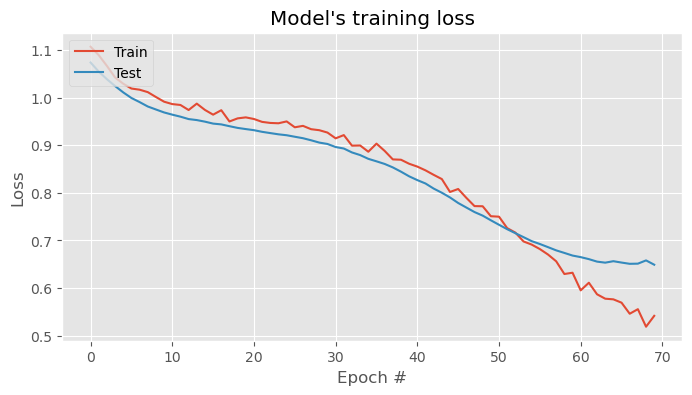

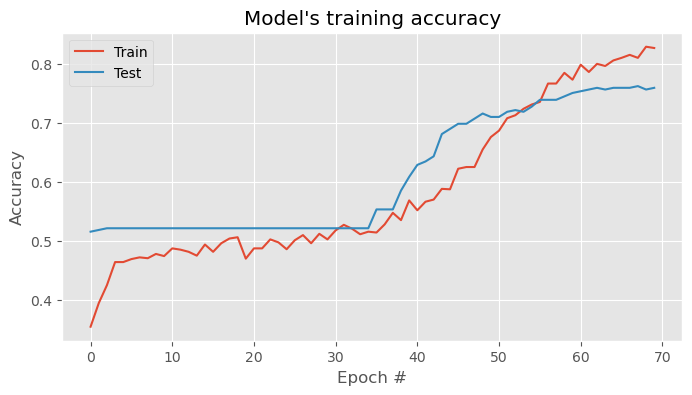

In [35]:
plot_loss(history)
plot_accuracy(history)

### Save Model

In [36]:
model_json = model.to_json()
with open("sentiment.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("sentiment.h5")
print("Model saved to disk.")

Model saved to disk.


### Load Model

In [37]:
from tensorflow.keras.models import model_from_json

json_file = open('sentiment.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into loaded model:
loaded_model.load_weights("sentiment.h5")
print("Model loaded from disk.")

Model loaded from disk.
